In [1]:
## Update sklearn to prevent version mismatches:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\rpmcl\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
## Install joblib (to save model): 
## *Restart your kernel after installing 
!pip install joblib

In [3]:
## Dependencies
import numpy as np
import pandas as pd

## Read CSV & Perform Basic Data Cleaning

In [42]:
df = pd.read_csv("../Resources/Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.iloc[:,10:21].head(10)

,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad
0,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83
1,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60
2,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46
3,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75
4,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77
5,-0.004610,0.755,0.212,-0.523,2.42900,0.16500,-0.16500,226.5,16.8,-16.8,1.59
6,-0.000517,0.052,0.262,-0.052,3.53470,0.02410,-0.02410,4914.3,33.3,-33.3,5.76
7,-0.000009,0.818,0.001,-0.001,1.74319,0.00107,-0.00107,14231.0,4.2,-4.2,13.04
8,-0.000016,0.224,0.159,-0.216,3.88864,0.00203,-0.00203,6674.7,1.7,-1.7,16.10
9,-0.000047,0.631,0.007,-0.007,3.19843,0.00653,-0.00653,9145.7,6.6,-6.6,14.59


In [5]:
df.shape

(6991, 41)

## Set Target & Select Features

In [6]:
target = df['koi_disposition']
target.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [7]:
features = df.drop(columns=['koi_disposition']).columns
len(features)

40

In [43]:
features

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [8]:
# Select features (remove error columns)
selected_features = df[
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
    'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
    'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
    'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg',
    'koi_srad', 'ra', 'dec', 'koi_kepmag'
]

## Train / Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [10]:
## Check split
print(round(len(X_train)/len(selected_features), 2))
print(round(len(X_test)/len(selected_features), 2))

0.75
0.25


In [11]:
print(round(len(y_train)/len(target), 2))
print(round(len(y_test)/len(target), 2))

0.75
0.25


## Pre-processing

In [12]:
## Encode Target
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

## Label-encode
label_encoder = LabelEncoder()
label_encoder.fit(target)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## One-hot encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages

In [13]:
target_names = label_encoder.inverse_transform([0, 1, 2])
target_names

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

In [14]:
## Scale Features
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler model & Fit to training data
X_scaler = MinMaxScaler().fit(X_train)

# Transform training & testing data using X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Model Training

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [16]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6654587068472249
Testing Data Score: 0.6596109839816934


In [17]:
predictions = classifier.predict(X_test)
print(f"First 10 predictions: {predictions[:10].tolist()}")
print(f"First 10 real: {y_test[:10].tolist()}")

First 10 predictions: ['CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE']
First 10 real: ['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE']


In [18]:
## Classification Report
from sklearn.metrics import classification_report
# predictions = model.predict(X_test)
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.44      0.23      0.31       411
     CONFIRMED       0.64      0.68      0.66       484
FALSE POSITIVE       0.72      0.85      0.78       853

      accuracy                           0.66      1748
     macro avg       0.60      0.59      0.58      1748
  weighted avg       0.63      0.66      0.63      1748



In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_encoded)

LogisticRegression(max_iter=1000)

In [20]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.8483692542437535
Testing Data Score: 0.8443935926773455


In [21]:
predictions = model.predict(X_test_scaled)
print(f"First 10 predictions: {label_encoder.inverse_transform(predictions[:10]).tolist()}")
print(f"First 10 real: {label_encoder.inverse_transform(y_test_encoded[:10]).tolist()}")

First 10 predictions: ['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CONFIRMED', 'CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE']
First 10 real: ['FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'CANDIDATE', 'CANDIDATE', 'FALSE POSITIVE']


In [22]:
## Classification Report
from sklearn.metrics import classification_report
# predictions = model.predict(X_test_scaled)
print(classification_report(y_test_encoded, predictions, target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.70      0.63      0.67       411
     CONFIRMED       0.72      0.75      0.73       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.84      1748
     macro avg       0.80      0.79      0.80      1748
  weighted avg       0.84      0.84      0.84      1748



In [ ]:
model.feature_importances_

### Add Residual Plot, Add Feature Plot

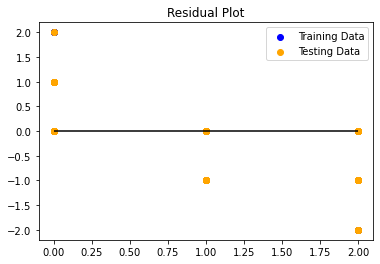

In [23]:
# Plot Residual Values [Residual = Observed - Predicted]
import matplotlib.pyplot as plt

# predictions = model.predict(X_test_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_encoded - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_encoded - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_encoded.min(), xmax=y_test_encoded.max())
plt.title("Residual Plot")
plt.show()

In [25]:
y_score = model.predict_proba(X_test_scaled)[:,1]
len(y_score)
# len(y_test_encoded)

1748

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_encoded, y_score, average=None)

TypeError: roc_curve() got an unexpected keyword argument 'average'

In [32]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test_encoded, y_score, multi_class="ovr"))

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
from sklearn import metrics

In [47]:
probs = model.predict_proba(X_test_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_encoded, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()


ValueError: multiclass format is not supported

## Model Tuning (Hyperparameters)

Use `GridSearchCV` to tune the model's parameters

In [37]:
## Get list of available parameters
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [38]:
# # Create the GridSearchCV model
# from sklearn.model_selection import GridSearchCV

# # param_grid = {'C': [1, 5, 10], 
# #               'gamma': [0.0001, 0.001, 0.01]}

# param_grid = {'penalty': ['l1', 'l2'],
#               'C': np.logspace(-4, 4, 20),
#               'solver': ['liblinear']}


# grid = GridSearchCV(model, param_grid, verbose=3)

In [39]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train_encoded)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l

[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l1, solver=liblinear; total time=   2.2s
[CV] END ..C=4.281332398719396, penalty=l1, solver=liblinear; total time=   1.4s
[CV] END ..C=4.2813323987193

C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time= 2.9min
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=  13.3s


C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time= 2.9min
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=  14.6s


C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time= 3.0min
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.3s


C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time= 3.0min
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=  12.6s


C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time= 2.9min


C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time= 2.9min


C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time= 2.9min
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.4s


C:\Users\rpmcl\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=2)

In [40]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10000.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.8851774499887206


## Save Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
# joblib.dump(your_model, filename)
joblib.dump(model, filename)